# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.


## [What is Kaggle ? ](https://www.kaggle.com/)

- Kaggle is an online community of data scientists and machine learners, owned by Google LLC. 
- Kaggle has 3 mains aspects to it :
    - Datasets : This website hosts datasets on a pleothra amount of topics.
    - Competitions : There are companies posting their own datasets, and asking community to solve them. Sometimes companies offer monetary prizes whereas sometimes job openings are present. Companies like Facebook, RedHat, Bosch and many more organize these competitions. We will be doing Titanic Machine Learning from Disaster challenge.
    

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')
# To hide warnings, which won't change the desired outcome.


In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 3px  black solid !important;
  color: black !important;
}
# For having gridlines 

In [4]:
train = pd.read_csv('titanic_train.csv')
# Reading titanic_train file as dataframe

In [5]:
import warnings
warnings.filterwarnings("ignore")

### Data Dictionary

| **Variable** | **Definition**                             | **Key**                                        |
| :----------- | :----------------------------------------- | :--------------------------------------------- |
| survival     | Survival                                   | 0 = No, 1 = Yes                                |
| pclass       | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex          | Sex                                        |                                                |
| Age          | Age in years                               |                                                |
| sibsp        | # of siblings / spouses aboard the Titanic |                                                |
| parch        | # of parents / children aboard the Titanic |                                                |
| ticket       | Ticket number                              |                                                |
| fare         | Passenger fare                             |                                                |
| cabin        | Cabin number                               |                                                |
| embarked     | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

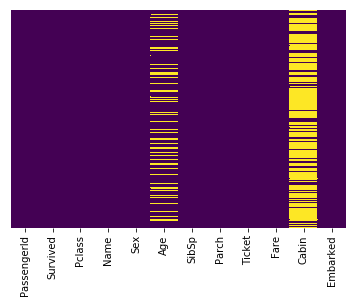

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

- This creates a heatmap of boolean values True/False we get from train.isnull(), every yellow dash stands for a true point, that is the point where null is present there we have true. From this we can infer that lots of age information is missing and the information missing the most is cabin information and very few in embarked. Roughly about 20% of age data is missing.

- As age data missing proportionately is likely small enough for us to be able to replace it in some manner of computation, we can use knowledge from other columns to fill in the missing values of age column in a reasonable manner.

- However, on seeing cabin column we are missing too much of the data to do something useful out of it. We might as well drop it.

In [8]:
sns.set_style('whitegrid')

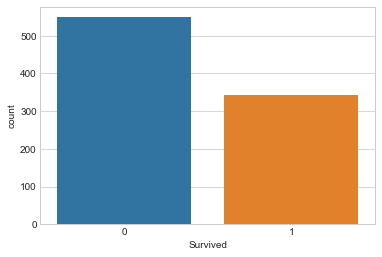

In [9]:
# Getting an idea about ratio of actual target variables of survival on train data
sns.countplot(x='Survived',data=train)
# Roughly speaking closer to 550 people perished and 300 something people survived.

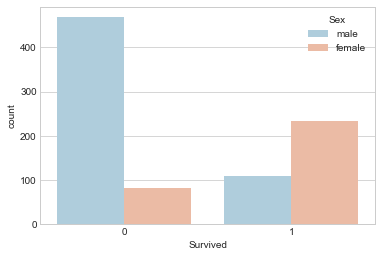

In [10]:
#  Seeing survival as per gender
sns.countplot(x='Survived',hue="Sex",data=train,palette="RdBu_r")
# Looks like Jack did made a sacrifice. Clearly more women survived when compared to men onboard.
# We will see more about these when we analyse factors which play a crucial role in someone's survival.

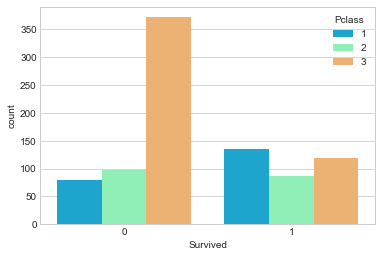

In [11]:
# Visualising as per Passenger class to compare people of which class survived more
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
# We can infer that people who perished among those there are more probability of those belongging to class 3.
# People who survived had more probability of being from class 1 or 2.

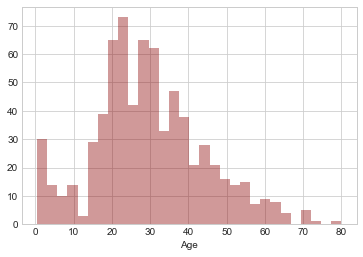

In [12]:
# Let's get an idea about age of people onboard : For this we can do a distribution type plot
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)
#  What we can infer is that this appears to be bimodal distribution, there are quite a few passengers in age range of 0-10,
#  after that there is an average age between 20-30 and as older you get number of passengers decreases onboard.

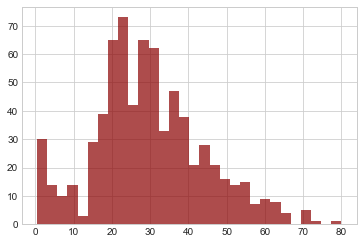

In [13]:
# We could have also done the same using pandas visualisation in the following manner :
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

In [14]:
# To get basic idea about columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


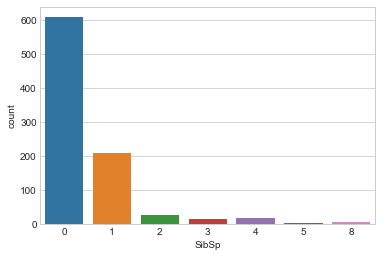

In [15]:
# We have seen Survived column, Sex, Age, Pclass column already, let's check SibSp - Siblings/Spouse onboard column
sns.countplot(x='SibSp',data=train)
# Looking at this plot we can see that around 600 had 0 siblings or spouse onboard, closer to 200 people had 1 of the sibling
# or spouse onboard. Very few numbers of siblings/spouse for other 91 passengers in train dataset.
# Thus, there were a lot of single people onboard.

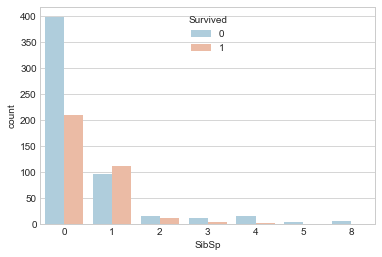

In [16]:
sns.countplot(x='SibSp',data=train,hue='Survived',palette="RdBu_r")
# Comparing amongst SibSp column who survived or not we see that survival factor is more for people who were not travelling 
# alone.

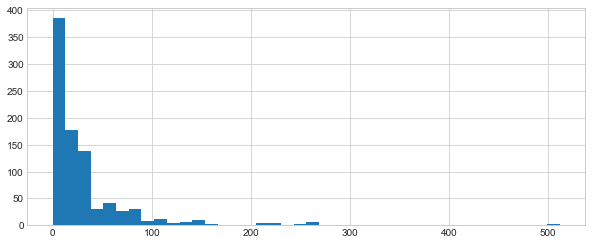

In [17]:
# Let's explore fare column : Here we will see how much people paid as distribution
train['Fare'].hist(bins=40,figsize=(10,4))
# This lines up with our previous observation as most of the passengers were in cheaper third class due to that,
# here also we see that most of the tickets are bought between 0 to 50.

In [18]:
# To have an interactive plots we could also use cufflink
import cufflinks as cf
cf.go_offline()
train['Fare'].iplot(kind='hist',bins=30)
# Allows us to zoom in get exact values about the numbers and much more.

- We have explored the data, got some idea about nature of the dataset, how columns realte with survival rate in some cases, now we can move towards Data Cleaning and Building a logistic regression model.

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


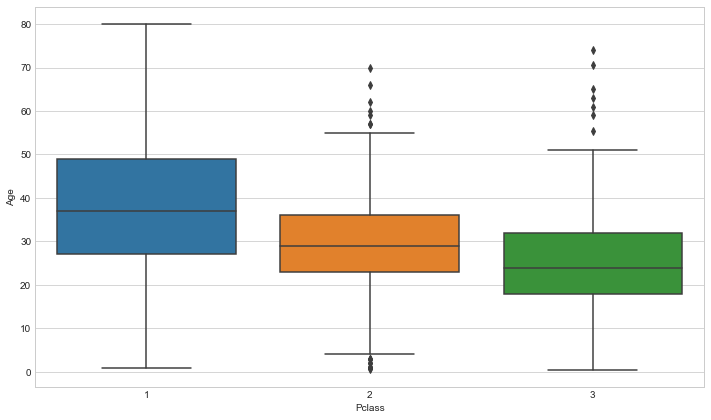

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train)
# We can see that upon separation by class the wealthier passengers in the first and second class tend to be actually a bit more
# older than the passengers of third class. We can use these average age vallues to impute the age based off of passenger class.

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [20]:
#  We may create an entire model to predict age based off of other features.
def impute_age(cols):
    Age = cols[0] # First item in cols
    Pclass = cols[1] # Second item
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else: # Not in first or second class means it is third class
            return 24
    else: #If age is null then we return some int based upon average age of that Pclass but if it is not then we do following :
        return Age

In [21]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1) # axis = 1 as we want to apply it across columns

## What I did above ?

- Created a function that takes in an argument cols, based off of index values we grab Age and Pclass, as we are using .apply() on Age and Pclass columns then we search for condition where pd.isnull(Age) is true then we look for the Pclass for that entry, and we return the average age of that class based off of Pclass and so on for second and third class. 

- If it is not null then we know the age and return the actual age.

- axis = 1 for applying on columns.

## Checking Heatmap

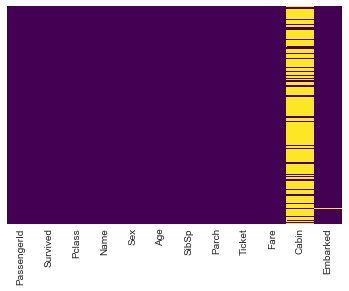

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# This means that now we do not have any missing information for age column. We have successfully put in age values based off
# of people's class's average./

In [23]:
# About cabin column, as there are too many missing points in here it is easier to drop the cabin column.
train.drop("Cabin",axis=1, inplace=True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


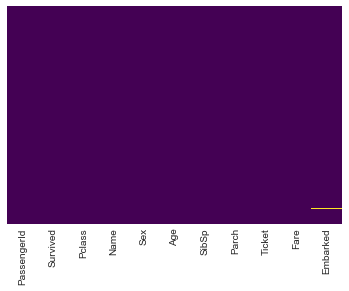

In [25]:
# We no longer have cabin column and now upon running heatmap again
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
#As embarked has only a row or two of missing values we drop it
train.dropna(inplace=True)

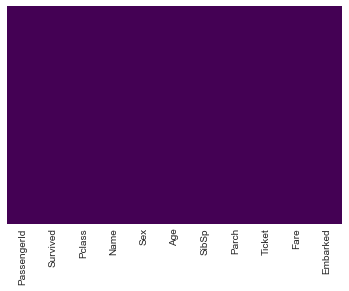

In [27]:
sns.heatmap(train.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


- Now we do not have any missing values. We filled in some of the missing values and dropped a very few. Now data is clean.

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs. What we mean to say that for columns like Sex we have male or female, for ML algorithm to understand this we have to assign them a number say 0 for male and 1 for female, this is called creating a dummy variable and we would be doing the same for Embarked columns like Q,S,C.

In [29]:
# To do this we use get_dummies method() of pandas which converts categorical variables into dummy or indicator variables.

dummy = pd.get_dummies(train['Sex']) # Passing in the column we want to convert and gives us a dataframe with col for every category.
# Here 0 in female column means there would be a 1 in male colummn for that entry as it can be male or female here.
# 1 in female column would mean this entry was a female and the male corresponding column would show 0.

dummy.head()

# The issue with what we get here is that in the one column is a perfect predictor of the other column, meaning if our
# ML algorithm gets fed the columns then ML algorithm will immediately know that if it's 0 at female then it 
# will predict perfectly that it is 1 at male. This is going to be an issue called multi-collinearity. It will mess up the
# algorithm as bunch of columns will be perfect predictors of other columns. To avoid this we type drop_first = True

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [30]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [31]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [32]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [33]:
embark.head()
# We see that dropping C would result in current indicators being present of Q and S and as these are not perfect indicators
# of each other.

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [34]:
train = pd.concat([train,sex,embark],axis=1) # To add new indicator variable or dummy to dataframe via concatenation

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [36]:
# Now we can drop columns like Name, Ticket, Embarked and Sex
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [37]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [38]:
train = pd.concat([train,sex,embark],axis=1)

In [39]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = train.drop("Survived",axis=1)
y = train['Survived']

In [43]:
X_train,X_test,y_train,y_test= train_test_split(X, y,test_size=0.30, random_state=101)

## Training and Predicting

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logmodel = LogisticRegression()

In [46]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
predictions = logmodel.predict(X_test)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [50]:
from sklearn.metrics import  confusion_matrix

In [51]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)

Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

## Great Job!